In [1]:
from __future__ import division

import os
import numpy as np
import pandas as pd
import ta
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('DF_SPY.csv', parse_dates=['Date'], index_col=['Date'])

In [3]:
input_size = 5
num_steps = 12
n_epochs = 200

cutoff = int(len(df) * 0.8)
cutoff = int(cutoff / input_size)

In [4]:
seq = df['Return'].values
seq = [np.array(seq[i * input_size: (i + 1) * input_size]) for i in range(len(seq) // input_size)]

y = np.array([seq[i + num_steps] for i in range(len(seq) - num_steps)])
y_train, y_test = y[:cutoff], y[cutoff:]

In [5]:
seq = df['Wavelet_Return'].values
seq = [np.array(seq[i * input_size: (i + 1) * input_size]) for i in range(len(seq) // input_size)]

X = np.array([seq[i: i + num_steps] for i in range(len(seq) - num_steps)])
x_train, x_test = X[:cutoff], X[cutoff:]

model = Sequential()
model.add(LSTM(256, dropout=0.1, return_sequences=True))
model.add(LSTM(128, dropout=0.1))
model.add(Dense(5))
model.compile(optimizer='RMSprop', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=n_epochs)

Epoch 1/200
870/870 [==============================] - 3s 4ms/step - loss: 2.2655e-04
Epoch 2/200
870/870 [==============================] - 2s 2ms/step - loss: 1.7950e-04
Epoch 3/200
870/870 [==============================] - 2s 2ms/step - loss: 1.7598e-04
Epoch 4/200
870/870 [==============================] - 2s 2ms/step - loss: 1.7358e-04
Epoch 5/200
870/870 [==============================] - 2s 3ms/step - loss: 1.7129e-04
Epoch 6/200
870/870 [==============================] - 2s 2ms/step - loss: 1.7197e-04
Epoch 7/200
870/870 [==============================] - 2s 2ms/step - loss: 1.6922e-04
Epoch 8/200
870/870 [==============================] - 2s 2ms/step - loss: 1.7018e-04
Epoch 9/200
870/870 [==============================] - 2s 2ms/step - loss: 1.6825e-04
Epoch 10/200
870/870 [==============================] - 2s 2ms/step - loss: 1.6949e-04
Epoch 11/200
870/870 [==============================] - 2s 2ms/step - loss: 1.6880e-04
Epoch 12/200
870/870 [==============================

870/870 [==============================] - 3s 4ms/step - loss: 1.5963e-04
Epoch 95/200
870/870 [==============================] - 3s 3ms/step - loss: 1.5655e-04
Epoch 96/200
870/870 [==============================] - 3s 4ms/step - loss: 1.5714e-04
Epoch 97/200
870/870 [==============================] - 3s 3ms/step - loss: 1.5752e-04
Epoch 98/200
870/870 [==============================] - 3s 3ms/step - loss: 1.5669e-04
Epoch 99/200
870/870 [==============================] - 4s 4ms/step - loss: 1.5949e-04
Epoch 100/200
870/870 [==============================] - 4s 5ms/step - loss: 1.5774e-04A: 1s - loss: 
Epoch 101/200
870/870 [==============================] - 3s 3ms/step - loss: 1.5655e-04
Epoch 102/200
870/870 [==============================] - 3s 3ms/step - loss: 1.5636e-04
Epoch 103/200
870/870 [==============================] - 3s 3ms/step - loss: 1.5984e-04
Epoch 104/200
870/870 [==============================] - 2s 3ms/step - loss: 1.5734e-04
Epoch 105/200
870/870 [==============

870/870 [==============================] - 3s 3ms/step - loss: 1.5504e-04
Epoch 187/200
870/870 [==============================] - 3s 3ms/step - loss: 1.5260e-04
Epoch 188/200
870/870 [==============================] - 3s 4ms/step - loss: 1.5357e-04
Epoch 189/200
870/870 [==============================] - 3s 4ms/step - loss: 1.5377e-04
Epoch 190/200
870/870 [==============================] - 3s 4ms/step - loss: 1.5399e-04
Epoch 191/200
870/870 [==============================] - 3s 4ms/step - loss: 1.5279e-04
Epoch 192/200
870/870 [==============================] - 3s 3ms/step - loss: 1.5261e-04
Epoch 193/200
870/870 [==============================] - 3s 4ms/step - loss: 1.5250e-04
Epoch 194/200
870/870 [==============================] - 3s 4ms/step - loss: 1.5477e-04
Epoch 195/200
870/870 [==============================] - 3s 3ms/step - loss: 1.5271e-04
Epoch 196/200
870/870 [==============================] - 3s 4ms/step - loss: 1.5440e-04
Epoch 197/200
870/870 [=======================

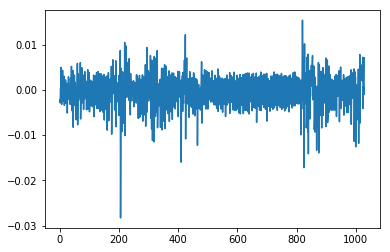

In [6]:
y_hat = model.predict(x_test)
plt.plot(y_hat.flatten())

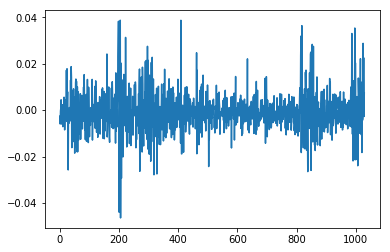

In [7]:
plt.plot(y_hat.flatten() - y_test.flatten())

In [8]:
mean_squared_error(y_hat.flatten(), y_test.flatten())

8.452503322297433e-05

In [17]:
y_test.shape

(206, 5)

In [38]:
longshort = [100]
for i in range(y_test.shape[0]):
    val = 100
    for ret in y_hat[i]:
        val *= np.exp(ret)
    if val >= 100:  # buy/hold
        for ret in y_test[i]:
            longshort.append(longshort[-1] * np.exp(ret))
    else:
        for ret in y_test[i]:
            longshort.append(longshort[-1] * np.exp(-ret))

Text(0.5,1,'LSTM Portfolio Performance With Wavelet Denoising')

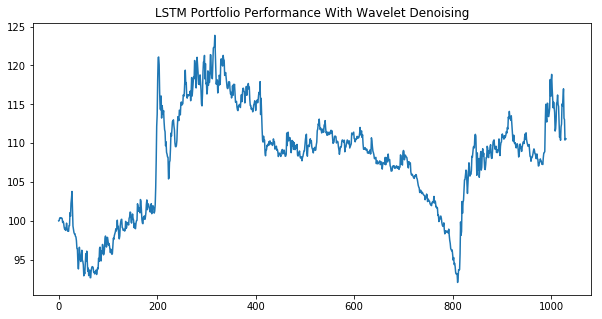

In [39]:
fig, ax = plt.subplots(figsize=[10, 5])
ax.plot(longshort)
ax.set_title('LSTM Portfolio Performance With Wavelet Denoising')

In [40]:
longshort = pd.Series(longshort)
returns = longshort.pct_change()

print 'Total Return =', longshort.iloc[-1] / longshort.iloc[0] - 1
print 'Return Mean = ', returns.mean() * 100
print 'Return Stdev = ', returns.std() * 100
print 'Sharpe = ', returns.mean() / returns.std() * 100

Total Return = 0.105533798297341
Return Mean =  0.0132284289126
Return Stdev =  0.836549660925
Sharpe =  1.58130826303


In [51]:
pd.DataFrame({'Wave + LSTM': longshort}).to_csv('WAVE.csv', index=False)

In [56]:
mean_squared_error(y_hat.flatten(), y_test.flatten())

8.452503322297433e-05

In [57]:
y_hat_train = model.predict(x_train)

mean_squared_error(y_hat_train.flatten(), y_train.flatten())

0.00015328571436832577

In [59]:
from decimal import Decimal

'%.2E' % Decimal('0.00015328571436832577')

'1.53E-04'